In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
import os 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = []
target = []
categories = ["glioma", "meningioma", "notumor", "pituitary"]
data_dir = r"F:\Machine Learning\course ML arabic Ahmed Rady\myCode\Projects\tumar detection\brain\Training"
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        image_path = os.path.join(path, img)
        image = cv2.imread(image_path,0)
        image = cv2.resize(image, (200, 200))
        image = np.array(image).flatten()
        data.append(image)
        target.append(i)
        
        

In [4]:
X_train = np.array(data)
y_train = np.array(target)


In [5]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5708,0,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5709,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5710,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0


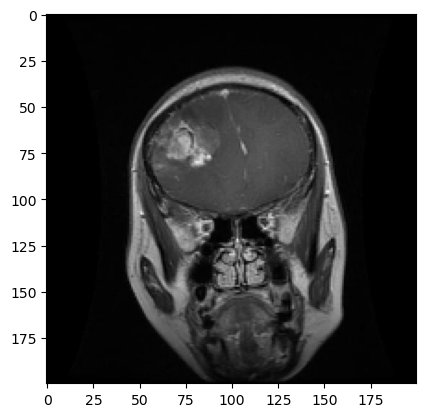

In [6]:
plt.imshow(X_train.values[0].reshape(200,200),cmap="gray")

In [7]:
data = []
target = []
categories = ["glioma", "meningioma", "notumor", "pituitary"]
data_dir = r"F:\Machine Learning\course ML arabic Ahmed Rady\myCode\Projects\tumar detection\brain\Testing"
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        image_path = os.path.join(path, img)
        image = cv2.imread(image_path,0)
        image = cv2.resize(image, (200, 200))
        image = np.array(image).flatten()
        data.append(image)
        target.append(i)
        
        

In [8]:
X_test = np.array(data)
y_test = np.array(target)


In [9]:
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1307,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1308,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,2,0,1,0
1309,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
pca = PCA(n_components=0.95)
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

In [12]:
pca_train.shape

(5712, 1072)

In [13]:
model_Log = LogisticRegression(max_iter=800)
model_Log.fit(pca_train,y_train)
print(model_Log.score(pca_train,y_train))
print(model_Log.score(pca_test,y_test))

0.9987745098039216
0.8779557589626239


In [14]:
model_Ran = RandomForestClassifier()
model_Ran.fit(pca_train,y_train)
print(model_Ran.score(pca_train,y_train))
print(model_Ran.score(pca_test,y_test))

1.0
0.8794813119755912


In [15]:
model_Ada = AdaBoostClassifier()
model_Ada.fit(pca_train,y_train)
print(model_Ada.score(pca_train,y_train))
print(model_Ada.score(pca_test,y_test))

0.7237394957983193
0.6605644546147978


In [16]:
'''model_Gra = GradientBoostingClassifier()
model.fit(pca_train,y_train)
print(model.score(pca_train,y_train))
print(model.score(pca_test,y_test))'''

'model_Gra = GradientBoostingClassifier()\nmodel.fit(pca_train,y_train)\nprint(model.score(pca_train,y_train))\nprint(model.score(pca_test,y_test))'

In [17]:
model_svc = SVC()
model_svc.fit(pca_train,y_train)
print(model_svc.score(pca_train,y_train))
print(model_svc.score(pca_test,y_test))

0.9593837535014006
0.9031273836765827


In [18]:
y_pred = model_Log.predict(pca_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[229,  55,   3,  13],
       [ 38, 241,  16,  11],
       [  3,   2, 400,   0],
       [  3,  13,   3, 281]], dtype=int64)

Text(50.72222222222221, 0.5, 'true')

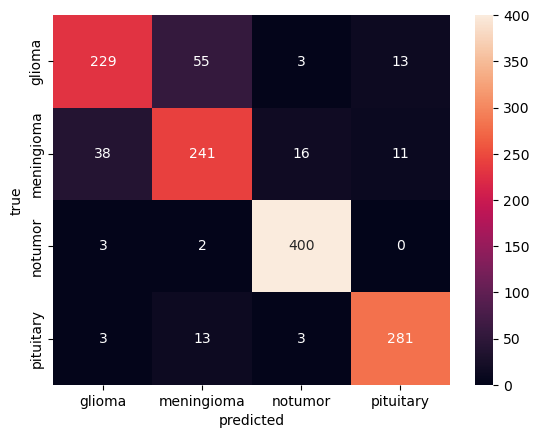

In [19]:
sns.heatmap(cm,annot = True ,fmt = 'g',xticklabels=categories,yticklabels=categories)
plt.xlabel("predicted")
plt.ylabel("true")

In [23]:
pd.DataFrame(y_test).value_counts()

notumor       405
meningioma    306
glioma        300
pituitary     300
dtype: int64

In [25]:
f1_score(y_test,y_pred,average='macro')

0.8691946913753794

In [26]:
precision_score(y_test, y_pred, average="macro")

0.870731556740946

In [27]:
recall_score(y_test, y_pred, average="macro")

0.8688090050835149

In [28]:
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
grid_space =[ 
    {"C": [1,10,20], "kernel": ["rbf"], "gamma": [1,.1]},
    
]
clf = GridSearchCV(estimator=SVC(),param_grid=grid_space,cv=5)
clf.fit(pca_test,y_test)
clf.score(pca_test,y_test)

1.0

In [33]:
clf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [34]:
grid_dist = [
    {"max_depth": np.arange(1,10), "n_estimators": [50,100,150,200,250,400,500]}
]
clf2 = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions= grid_dist,n_iter=3,random_state=42)
clf2.fit(pca_train, y_train)
clf2.score(pca_test, y_test)

0.8054919908466819

In [35]:
clf2.best_params_

{'n_estimators': 400, 'max_depth': 9}

In [36]:
grid_space =[ 
    {"C": [1,10,20], "kernel": ['linear', 'poly', 'rbf', 'sigmoid'], "gamma": [1,.1]},
    
]
clf = GridSearchCV(estimator=SVC(),param_grid=grid_space,cv=5)
clf.fit(pca_test,y_test)
clf.score(pca_test,y_test)

1.0

In [38]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'poly'}

In [41]:
grid_space =[ 
    {"criterion": ["gini", "entropy", "log_loss"], "max_depth": [1,5,10]}    
]
clf3 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_space,cv=5)
clf3.fit(pca_test,y_test)
clf3.score(pca_test,y_test)

0.7574370709382151

In [42]:
clf3.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [44]:
'''
grid_space =[ 
    {"penalty": ['l1', 'l2', 'elasticnet'], "C": [1,0.1,10]}    
]
clf4 = GridSearchCV(estimator=LogisticRegression(max_iter=500),param_grid=grid_space,cv=5)
clf4.fit(pca_test,y_test)
clf4.score(pca_test,y_test)
 penalty : {'l1', 'l2', 'elasticnet', None}, default='l2'
 C : float, default=1.0
 max_iter : int, default=100
 multi_class : {'auto', 'ovr', 'multinomial'}
'''

c:\Users\Mostfa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mostfa\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mostfa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Mostfa\anaconda3\Lib\site-packages\sklearn\linear_model

"\n penalty : {'l1', 'l2', 'elasticnet', None}, default='l2'\n C : float, default=1.0\n max_iter : int, default=100\n multi_class : {'auto', 'ovr', 'multinomial'}\n"

In [45]:
'''clf4.best_params_'''

{'C': 0.1, 'penalty': 'l2'}